In [3]:
import yfinance as yf

# Define the ticker symbol
ticker_symbol = "AAPL"

# Define the start and end dates for the data
start_date = "2020-01-01"
end_date = "2024-03-31"

# Download the data
df = yf.download(ticker_symbol, start=start_date, end=end_date)

# Print the first few rows of the data
print(df.head())


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  73.059425  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.349136  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.925644  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.582649  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.750267  132079200


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059425,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349136,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925644,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582649,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750267,132079200


In [5]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler()

In [8]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [9]:
df_scale = scaler.fit_transform(df['Close'].values.reshape(-1,1))

In [10]:
df_scale

array([[0.13375114],
       [0.1286109 ],
       [0.13278292],
       ...,
       [0.80002469],
       [0.82537361],
       [0.81248787]])

In [11]:
import numpy as np
def create_dataset(df, time_steps):
    X, y = [], []
    for i in range(len(df) - time_steps - 1):
        X.append(df[i:(i + time_steps), 0])
        y.append(df[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 10
x, y = create_dataset(df_scale, time_steps)

In [12]:
train = int(len(x) * 0.8)

In [13]:
train

844

In [29]:
x_tr, x_te = x[:train], x[train:]
y_tr, y_te = y[:train], y[train:]

In [30]:
# Reshape the data for LSTM input
x_tr = x_tr.reshape(x_tr.shape[0], x_tr.shape[1], 1)
x_te = x_te.reshape(x_te.shape[0], x_te.shape[1], 1)

In [32]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM
# Build the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(time_steps, 1)),
    LSTM(units=50, return_sequences=False),
    Dense(units=1)
])

In [33]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_tr, y_tr, epochs=100, batch_size=32)


Epoch 1/100
27/27 [==============================] - 4s 9ms/step - loss: 0.0537
Epoch 2/100
27/27 [==============================] - 0s 8ms/step - loss: 0.0047
Epoch 3/100
27/27 [==============================] - 0s 8ms/step - loss: 0.0022
Epoch 4/100
27/27 [==============================] - 0s 8ms/step - loss: 0.0016
Epoch 5/100
27/27 [==============================] - 0s 8ms/step - loss: 0.0014
Epoch 6/100
27/27 [==============================] - 0s 8ms/step - loss: 0.0015
Epoch 7/100
27/27 [==============================] - 0s 8ms/step - loss: 0.0014
Epoch 8/100
27/27 [==============================] - 0s 9ms/step - loss: 0.0014
Epoch 9/100
27/27 [==============================] - 0s 8ms/step - loss: 0.0015
Epoch 10/100
27/27 [==============================] - 0s 9ms/step - loss: 0.0014
Epoch 11/100
27/27 [==============================] - 0s 8ms/step - loss: 0.0014
Epoch 12/100
27/27 [==============================] - 0s 9ms/step - loss: 0.0014
Epoch 13/100
27/27 [=================

In [34]:
# Evaluate the model
mse = model.evaluate(x_te, y_te)
print("Mean Squared Error:", mse)

7/7 [==============================] - 1s 4ms/step - loss: 4.0141e-04
Mean Squared Error: 0.0004014133883174509


In [36]:

# Make predictions
predictions = model.predict(x_te)

# Inverse transform the predictions
predictions = scaler.inverse_transform(predictions)


7/7 [==============================] - 1s 4ms/step


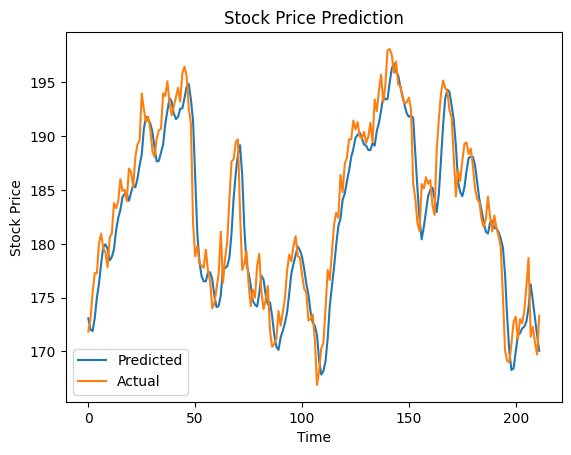

In [37]:
# Visualize the predictions
import matplotlib.pyplot as plt

plt.plot(predictions, label='Predicted')
plt.plot(scaler.inverse_transform(y_te.reshape(-1, 1)), label='Actual')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()